In [1]:
import cv2
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.fABBA_test import fABBA
import matplotlib.gridspec as gridspec
from skimage.metrics import mean_squared_error

!rm -r 'datasets/image_samples/.ipynb_checkpoints'

rm: cannot remove 'datasets/image_samples/.ipynb_checkpoints': No such file or directory


In [2]:
def load_images(folder, shape=(250, 250)):
    images = list()
    figs = os.listdir(folder)
    for filename in figs:
        img = cv2.imread(os.path.join(folder,filename)) 
        img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB) # transform to grayscale: cv2.COLOR_BGR2GRAY or RGB cv2.COLOR_BGR2RGB
        img = cv2.resize(img, shape) # resize to 80x80
        if img is not None:
            images.append(img)
    images = np.array(images)
    # images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
    return images

def reassign_labels(labels, fix=None):
    if fix != None:
        value_count = pd.Series(labels[labels != fix]).value_counts()
    else:
        value_count = pd.Series(labels).value_counts()
    change = dict(zip(value_count.index, np.arange(value_count.shape[0])))
    change[fix] = value_count.shape[0]
    clabels = copy.deepcopy(labels)
    for i in range(len(labels)):
        labels[i] = change[labels[i]]
    return labels

In [3]:
folder = 'datasets/image_samples/'
data =  load_images(folder,shape=(300,300))

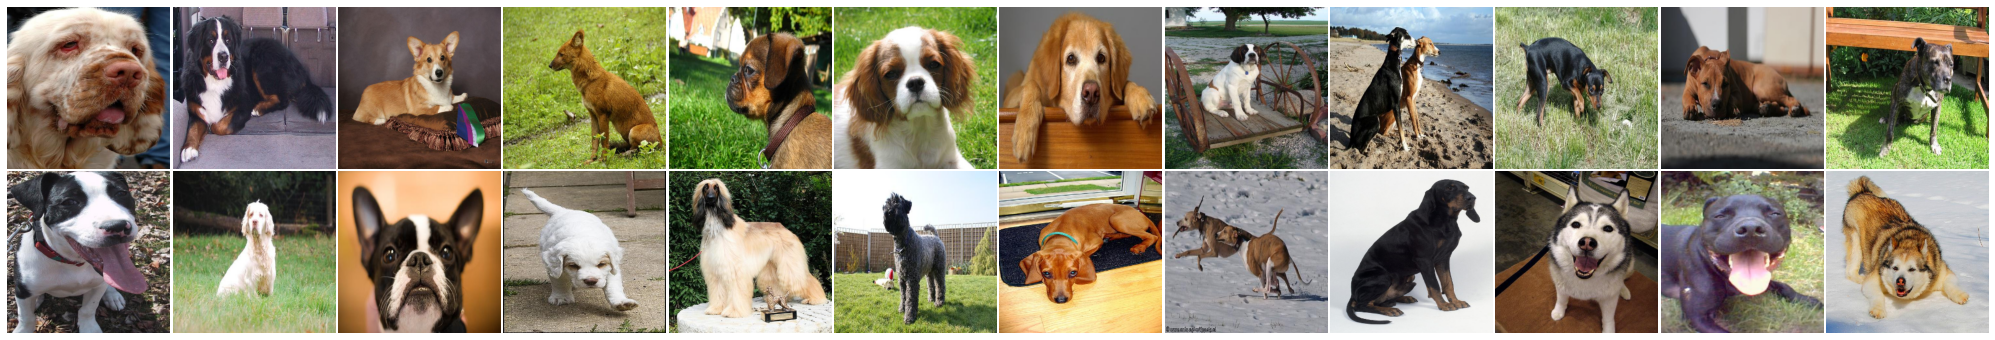

In [4]:
fig, axs = plt.subplots(2, 12, figsize=(35.5,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        axs[i,j].imshow(data[i*12 + j])
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/dogs_all_300.pdf', bbox_inches='tight')
plt.show()

Image 0:
Compression: Reduced series of length 270000 to 21971 segments. Digitization: Reduced 21971 pieces to 2586 symbols.
Compression rate:0.081  Digitization rate:0.118  MSE:1179.552

Image 1:
Compression: Reduced series of length 270000 to 8210 segments. Digitization: Reduced 8210 pieces to 3048 symbols.
Compression rate:0.030  Digitization rate:0.371  MSE:764.095

Image 2:
Compression: Reduced series of length 270000 to 59132 segments. Digitization: Reduced 59132 pieces to 2001 symbols.
Compression rate:0.219  Digitization rate:0.034  MSE:231.373

Image 3:
Compression: Reduced series of length 270000 to 189100 segments. Digitization: Reduced 189100 pieces to 1898 symbols.
Compression rate:0.700  Digitization rate:0.010  MSE:209.698

Image 4:
Compression: Reduced series of length 270000 to 88877 segments. Digitization: Reduced 88877 pieces to 3608 symbols.
Compression rate:0.329  Digitization rate:0.041  MSE:677.244

Image 5:
Compression: Reduced series of length 270000 to 84538 s

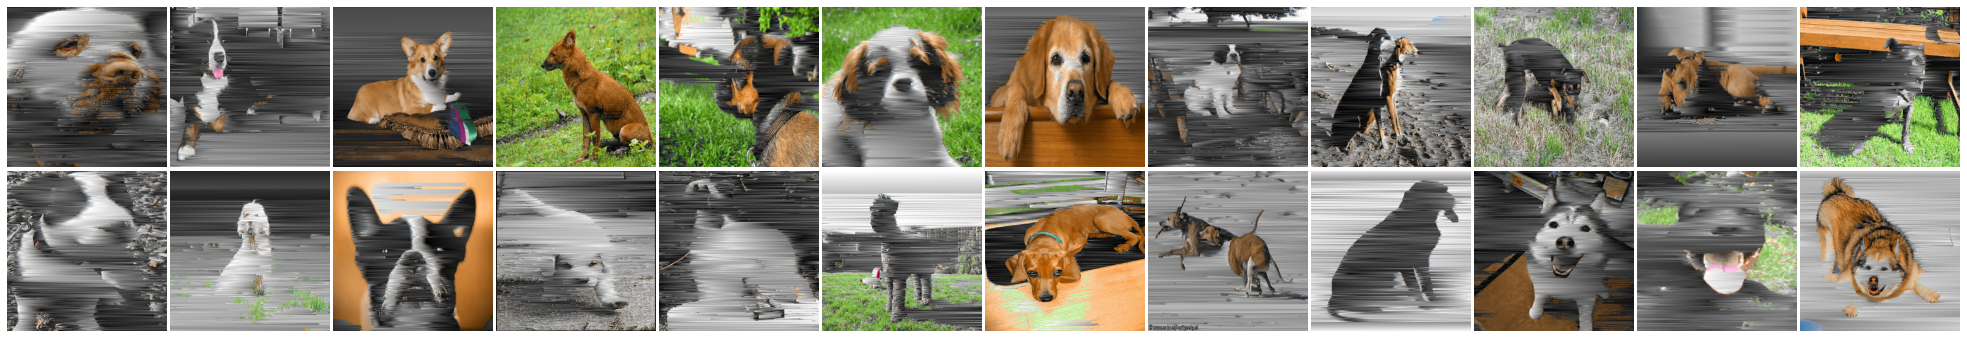

In [5]:
com_r = list()
dig_r = list()
mse = list()
save_df = pd.DataFrame()

fig, axs = plt.subplots(2, 12, figsize=(35,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        print("Image {}:".format(i*12 + j))
        fabba = fABBA(tol=0.5, scl=1, sorting="2-norm", alpha=0.001, verbose=1, max_len=np.inf) 
        strings, start, f = fabba.image_compress(data[i*12 + j], adjust=True)
        reconstruction = fabba.image_decompress(strings, start, data[i*12 + j].shape)
        
        com_r.append(f.compression_rate)
        dig_r.append(f.digitization_rate)
        mse.append(mean_squared_error(data[i*12 + j], reconstruction))
        
        print("Compression rate:{0:.3f}".format(com_r[-1]), "", 
              "Digitization rate:{0:.3f}".format(dig_r[-1]), "",
              "MSE:{0:.3f}".format(mse[-1]))
        print()
        axs[i,j].imshow(reconstruction)
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/reconst_dogs_all_0.5_300.pdf', bbox_inches='tight')
plt.show()

save_df['Compression rate 0.5'] = com_r
save_df['Digitization rate 0.5'] = dig_r
save_df['MSE 0.5'] = mse

Image 0:
Compression: Reduced series of length 270000 to 59591 segments. Digitization: Reduced 59591 pieces to 3092 symbols.
Compression rate:0.221  Digitization rate:0.052  MSE:539.804

Image 1:
Compression: Reduced series of length 270000 to 13065 segments. Digitization: Reduced 13065 pieces to 3583 symbols.
Compression rate:0.048  Digitization rate:0.274  MSE:445.338

Image 2:
Compression: Reduced series of length 270000 to 79606 segments. Digitization: Reduced 79606 pieces to 1942 symbols.
Compression rate:0.295  Digitization rate:0.024  MSE:157.963

Image 3:
Compression: Reduced series of length 270000 to 218277 segments. Digitization: Reduced 218277 pieces to 1478 symbols.
Compression rate:0.808  Digitization rate:0.007  MSE:69.626

Image 4:
Compression: Reduced series of length 270000 to 110255 segments. Digitization: Reduced 110255 pieces to 3556 symbols.
Compression rate:0.408  Digitization rate:0.032  MSE:323.044

Image 5:
Compression: Reduced series of length 270000 to 10317

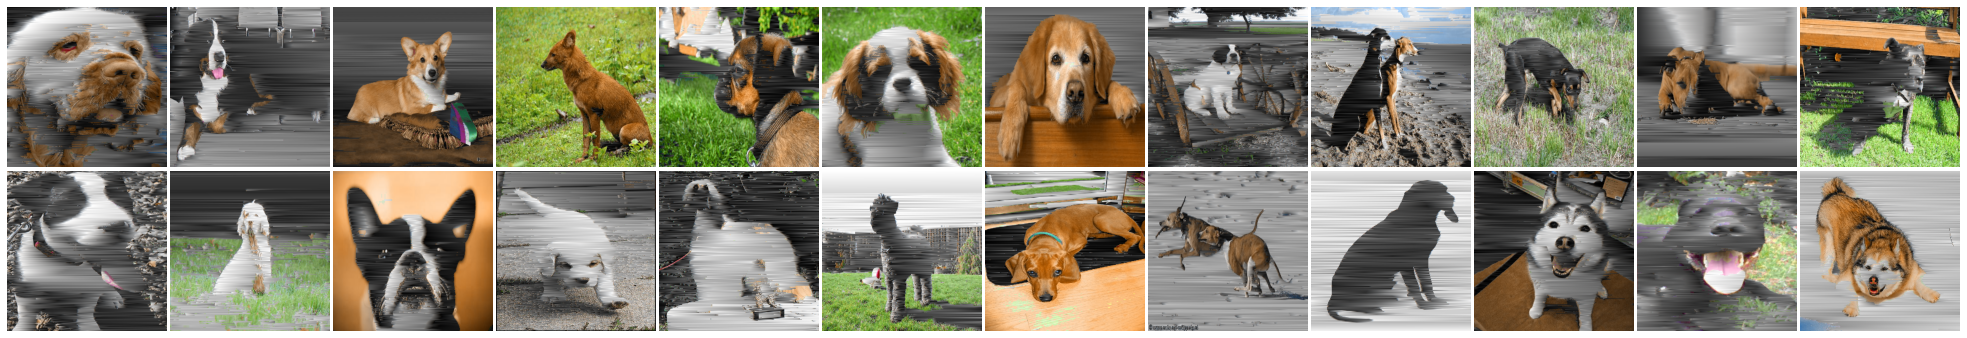

In [6]:
com_r = list()
dig_r = list()
mse = list()

fig, axs = plt.subplots(2, 12, figsize=(35,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        print("Image {}:".format(i*12 + j))
        fabba = fABBA(tol=0.3, scl=1, sorting="2-norm", alpha=0.001, verbose=1, max_len=np.inf) 
        strings, start, f = fabba.image_compress(data[i*12 + j], adjust=True)
        reconstruction = fabba.image_decompress(strings, start, data[i*12 + j].shape)
        
        com_r.append(f.compression_rate)
        dig_r.append(f.digitization_rate)
        mse.append(mean_squared_error(data[i*12 + j], reconstruction))
        
        print("Compression rate:{0:.3f}".format(com_r[-1]), "", 
              "Digitization rate:{0:.3f}".format(dig_r[-1]), "",
              "MSE:{0:.3f}".format(mse[-1]))
        print()
        axs[i,j].imshow(reconstruction)
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/reconst_dogs_all_0.3_300.pdf', bbox_inches='tight')
plt.show()

save_df['Compression rate 0.3'] = com_r
save_df['Digitization rate 0.3'] = dig_r
save_df['MSE 0.3'] = mse


Image 0:
Compression: Reduced series of length 270000 to 139654 segments. Digitization: Reduced 139654 pieces to 2346 symbols.
Compression rate:0.517  Digitization rate:0.017  MSE:69.367

Image 1:
Compression: Reduced series of length 270000 to 38863 segments. Digitization: Reduced 38863 pieces to 4536 symbols.
Compression rate:0.144  Digitization rate:0.117  MSE:138.164

Image 2:
Compression: Reduced series of length 270000 to 98544 segments. Digitization: Reduced 98544 pieces to 1784 symbols.
Compression rate:0.365  Digitization rate:0.018  MSE:56.530

Image 3:
Compression: Reduced series of length 270000 to 242109 segments. Digitization: Reduced 242109 pieces to 1031 symbols.
Compression rate:0.897  Digitization rate:0.004  MSE:9.810

Image 4:
Compression: Reduced series of length 270000 to 143201 segments. Digitization: Reduced 143201 pieces to 3089 symbols.
Compression rate:0.530  Digitization rate:0.022  MSE:77.636

Image 5:
Compression: Reduced series of length 270000 to 147287 

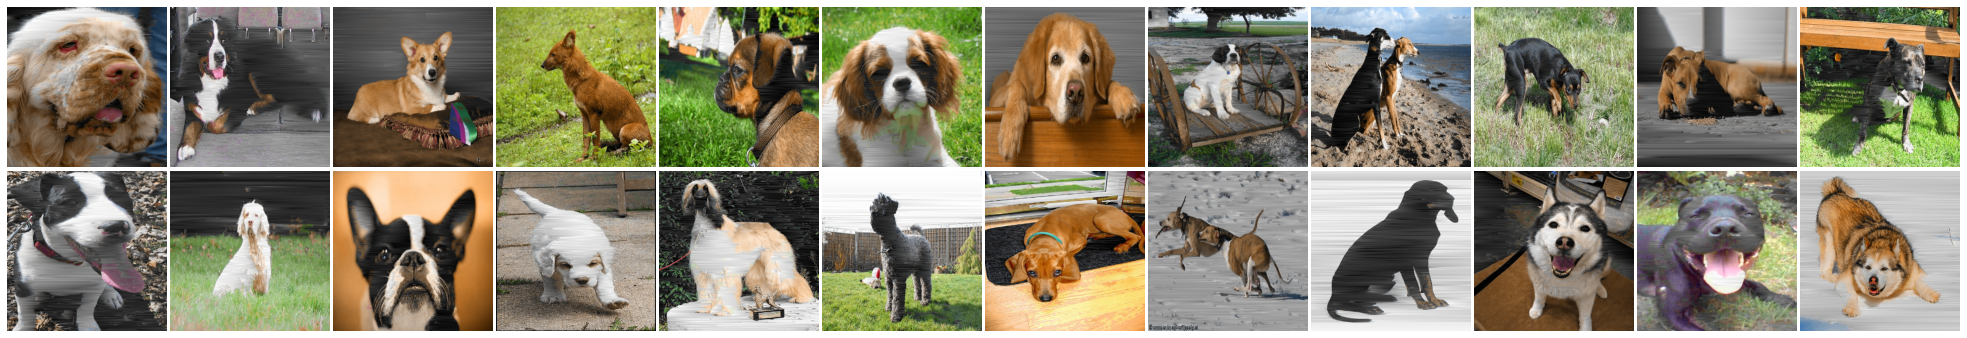

In [7]:
com_r = list()
dig_r = list()
mse = list()

fig, axs = plt.subplots(2, 12, figsize=(35,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        print("Image {}:".format(i*12 + j))
        fabba = fABBA(tol=0.1, scl=1, sorting="2-norm", alpha=0.001, verbose=1, max_len=np.inf) 
        strings, start, f = fabba.image_compress(data[i*12 + j], adjust=True)
        reconstruction = fabba.image_decompress(strings, start, data[i*12 + j].shape)
        
        com_r.append(f.compression_rate)
        dig_r.append(f.digitization_rate)
        mse.append(mean_squared_error(data[i*12 + j], reconstruction))
        
        print("Compression rate:{0:.3f}".format(com_r[-1]), "", 
              "Digitization rate:{0:.3f}".format(dig_r[-1]), "",
              "MSE:{0:.3f}".format(mse[-1]))
        print()
        axs[i,j].imshow(reconstruction)
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/reconst_dogs_all_0.1_300.pdf', bbox_inches='tight')
plt.show()

save_df['Compression rate 0.1'] = com_r
save_df['Digitization rate 0.1'] = dig_r
save_df['MSE 0.1'] = mse
save_df.to_csv('results/infoIMG_300.csv', index=False)